# Exploratory Data Analysis

#### Thinking1：

为什么我们需要在神经网络中使用非线性激活函数?

#### Answer1： 

在神经元中，输入的inputs通过加权求和，然后被作用了一个函数，这个函数就是激活函数 Activation Function。如果使用线性函数，每一层输出都是上层输入的线性函数，无论神经网络有多少层，输出都是输入的线性组合。加深神经网络的层数就没有什么意义了。线性函数的问题在于不管加深层数到多少，总是存在与之等效的「无隐藏层」的神经网络。

相反如果使用非线性函数，激活函数给神经元引入了非线性因素，使得神经网络可以任意逼近任何非线性函数，这样神经网络就可以应用到众多的非线性模型中。

#### Thinking2：

逻辑回归Logistic Loss是什么，解决分类问题 or 回归问题?

#### Answer2：

逻辑回归是将dependent variable的取值映射到[0,1]区间内，从而解决二分类问题

#### Action1：

使用numpy编写神经网络，完成boston房价预测问题

1. 数据加载：from sklearn.datasets import load_boston
2. 网络结构：
    * l1 = Linear(X, W1, b1)
    * s1 = Relu(l1)
    * l2 = Linear(s1, W2, b2)
    * cost = MSE(y, l2)
    * 隐藏层维度为10


| 指标  | 含义  |
|------|------|
|  CRIM  | 城镇人均犯罪率 |
|  ZN   | 住宅用地比例 |
|  INDUS  | 非零售商业用地比例 |
|  CHAS  | CHAS变量，0或者1 |
|  NOX  | 一氧化氮浓度 
|  AGE  | 1940年以前自用房屋的比例 |
|DIS|距离五个波士顿就业中心的加权距离|
|RAD|距离高速公路的便捷指数|
|TAX|该地区每一万美元的不动产税率|
|PRTATIO|该地区教师学生比例|
|B|该地区黑人比例|
|LSTAT|该地区中低收入阶层比例|

In [17]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

In [52]:
# Load data
from sklearn.datasets import load_boston
boston = load_boston()
X_df = pd.DataFrame(boston.data, columns=boston.feature_names)
y_df = pd.DataFrame(boston.target, columns=["target"])

In [20]:
#Check data
X_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
y_df.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [24]:
print(X_df.shape)
print(y_df.shape)

(506, 13)
(506, 1)


### 1.  Exploratory Analysis

### 1.1 Inference Statistics

In [45]:
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### 1.2 Check misisng values

In [37]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")

In [38]:
missing_zero_values_table(X_df)
missing_zero_values_table(y_df)

Your selected dataframe has 13 columns and 506 Rows.
There are 0 columns that have missing values.
Your selected dataframe has 1 columns and 506 Rows.
There are 0 columns that have missing values.


There is no missing value, we can feel free to do some predictions without worring about missing value worries

### 1.3 Check the data distributions

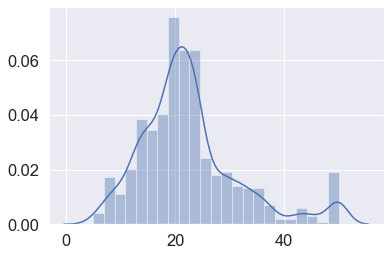

In [30]:
#check the distribution of target variable
sns.distplot(y_df)

The distribution of target variable is close to normal, but there are some outliers in right tail. We might need to normalize the data 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001397636DBA8>,
      dtype=object)

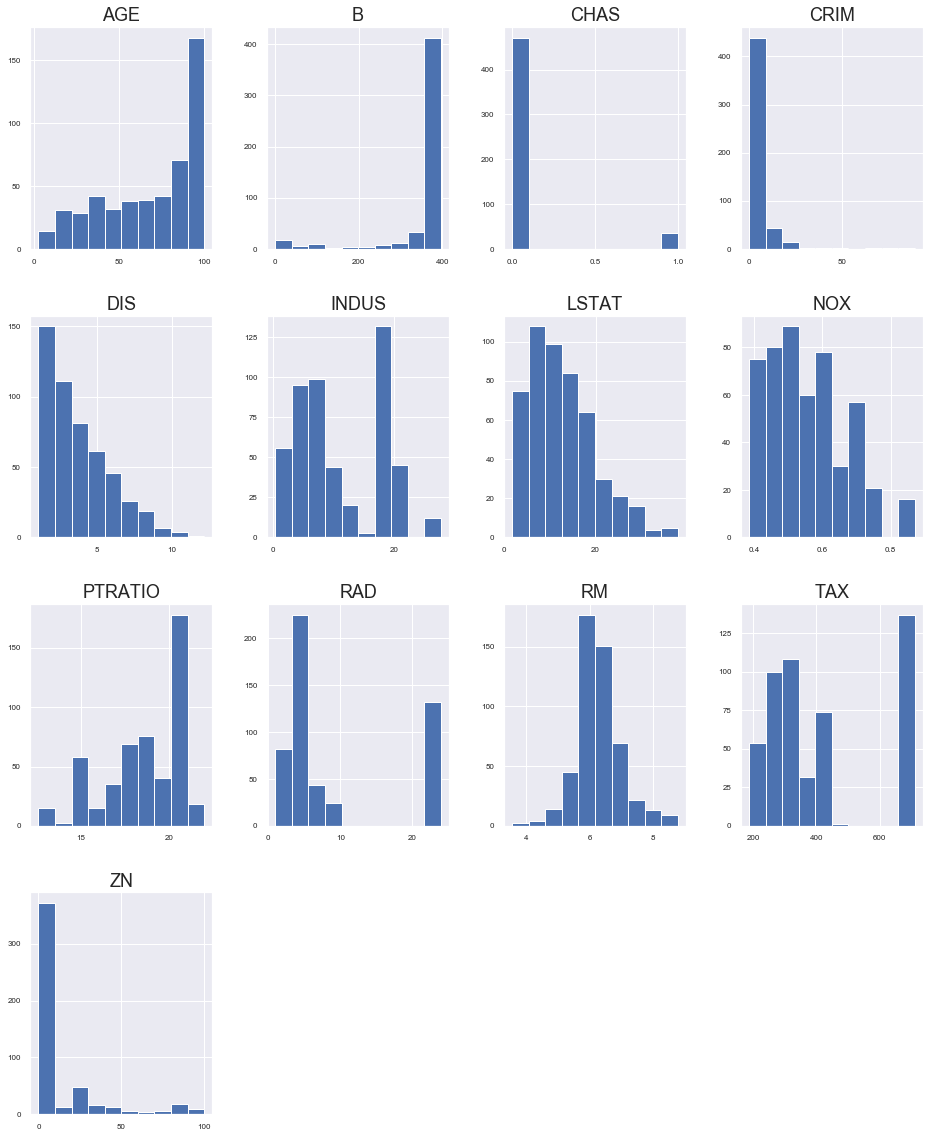

In [47]:
X_df.hist(figsize=(16,20), xlabelsize=8, ylabelsize=8)

### 1.4 Correlations

In [53]:
boston_df = pd.concat([X_df, y_df], axis=1)

In [54]:
corr_matrix = boston_df.corr()
print(corr_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [55]:
features_rel = corr_matrix['target']
print(features_rel)

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
target     1.000000
Name: target, dtype: float64


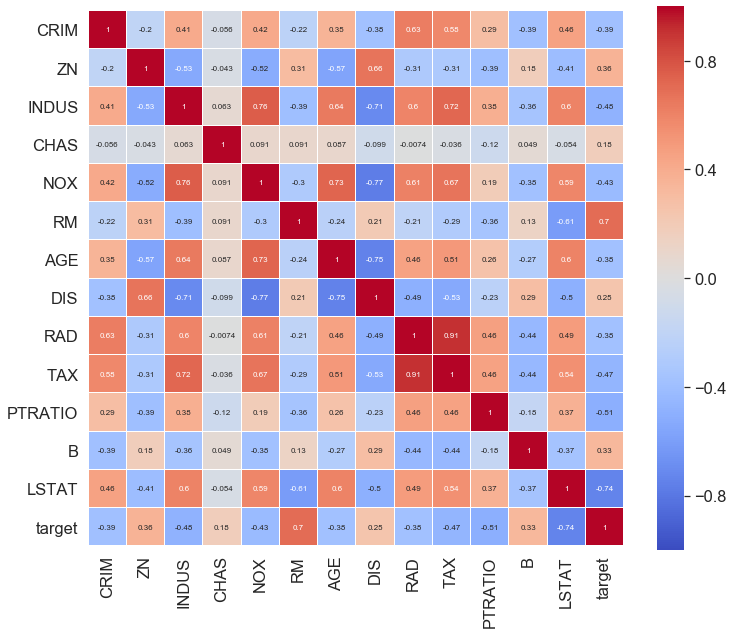

In [57]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size":8}, square=True)

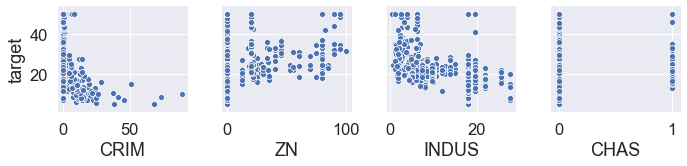

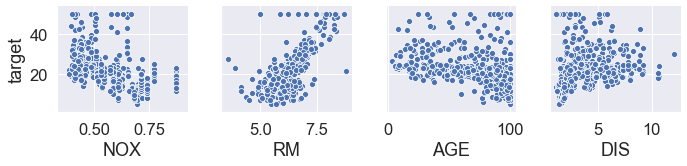

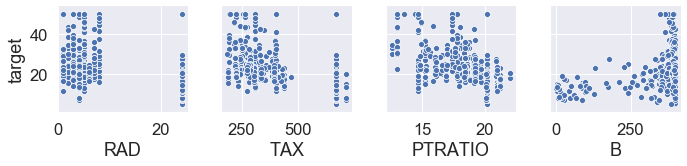

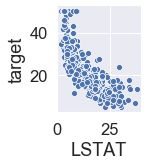

In [60]:
for i in range(0, len(boston_df.columns), 4):
    sns.pairplot(data=boston_df, x_vars=X_df.columns[i:i+4],y_vars=['target'])